In [1]:
class NejiData:
    def __init__(self) -> None:
        

333


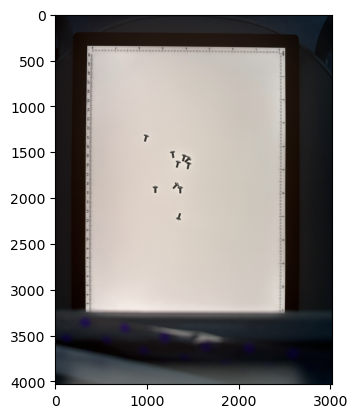

In [2]:
import matplotlib.pyplot as plt
import cv2

im = cv2.imread("../../data/imgs/02/10_1.JPG")
plt.imshow(im)
plt.show()

In [4]:
timg=im[427:3220,392:2422]
#切り抜きたい部分の座標を入力

cv2.imwrite("timg.jpg",timg)
cv2.waitKey(0)